In [1]:
import sys
dir_repo = '../'
sys.path.append(dir_repo)

from galaxy_generator.utils import get_config_from_yaml
from galaxy_generator.dcgan_generator import DCGAN_Generator

! rm -rf /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments/TestDCGAN/

In [2]:
config = get_config_from_yaml(dir_repo+'configs/dcgan_test.yaml')
generator = DCGAN_Generator(config=config)


------ Parameters ------

exp_name : TestDCGAN
cuda : True
ngpu : 1
gpu_device : 1
workers : 2
dir_image : /home/hhg/Research/galaxyClassify/catalog/galaxyZoo_kaggle/gz2_images/images
file_csv : /home/hhg/Research/galaxyClassify/catalog/galaxyZoo/zoo2/gz2_all_small_v2.csv
label_tag : label_8
num_classes : 8
class_weights : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
seed : 3
norm_mean : [0.094, 0.0815, 0.063]
norm_std : [0.1303, 0.11, 0.0913]
crop_size : 224
input_size : 64
n_channel : 3
n_zlatent : 50
n_filter_G : 64
n_filter_D : 64
num_epochs : 6
batch_size : 16
lr_G : 0.001
lr_D : 0.001
beta1 : 0.5
beta2 : 0.999
step_size_G : 2
step_size_D : 2
gamma_G : 0.1
gamma_D : 0.1
dir_output : /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments
nrow : 4
dpi : 400
freq_img : 10

------ Prepare Data ------

Number of training galaxies: 1000 (63 batches)

------ Build Model ------

Number of trainable parameters
Generator  : 3167104
Discriminator  : 3167104


## --- training --- 

In [3]:
from tqdm.notebook import tqdm

generator.train()


------ Create experiment directory ------

Training information will be stored at :
 	 /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments/TestDCGAN

[1/6 epoch] [1 iter]	 loss_D: 1.069 	 loss_G: 22.455	 D(x):0.647 	 D(G(z)): 0.389 / 0.000
	Training at epochID-0 | avg. netD loss: 2.393 | avg. netG loss 14.182
	Run time per epoch: 0m 5s
[2/6 epoch] [64 iter]	 loss_D: 1.907 	 loss_G: 0.286	 D(x):0.221 	 D(G(z)): 0.140 / 0.769
	Training at epochID-1 | avg. netD loss: 1.712 | avg. netG loss 1.648
	Run time per epoch: 0m 5s
[3/6 epoch] [127 iter]	 loss_D: 1.597 	 loss_G: 0.420	 D(x):0.733 	 D(G(z)): 0.712 / 0.662
	Training at epochID-2 | avg. netD loss: 1.143 | avg. netG loss 0.926
	Run time per epoch: 0m 5s
[4/6 epoch] [190 iter]	 loss_D: 1.027 	 loss_G: 1.000	 D(x):0.602 	 D(G(z)): 0.395 / 0.374
	Training at epochID-3 | avg. netD loss: 0.864 | avg. netG loss 1.281
	Run time per epoch: 0m 5s
[5/6 epoch] [253 iter]	 loss_D: 0.755 	 loss_G: 0.910	 D(x):0.895 	 D(G(z)): 0.4

### --- check training logs ---

In [4]:
import pickle

print(f'open file : {generator.file_trainInfo}')
trainInfo = pickle.load(file = open(generator.file_trainInfo, 'rb'))

open file : /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments/TestDCGAN/trainInfo.pkl


- ``TrainInfo`` stores the resulting generator and discrimintor losses at each iteration (`loss_G`, `loss_D`), the averaged losses at each epoch (`epoch_loss_G`, `epoch_loss_D`), as well ad the learning rate used (`lr_G`, `lr_D`). 

In [5]:
trainInfo.keys()

dict_keys(['loss_G', 'loss_D', 'epoch_loss_G', 'epoch_loss_D', 'lr_G', 'lr_D'])

### Plot training losses

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

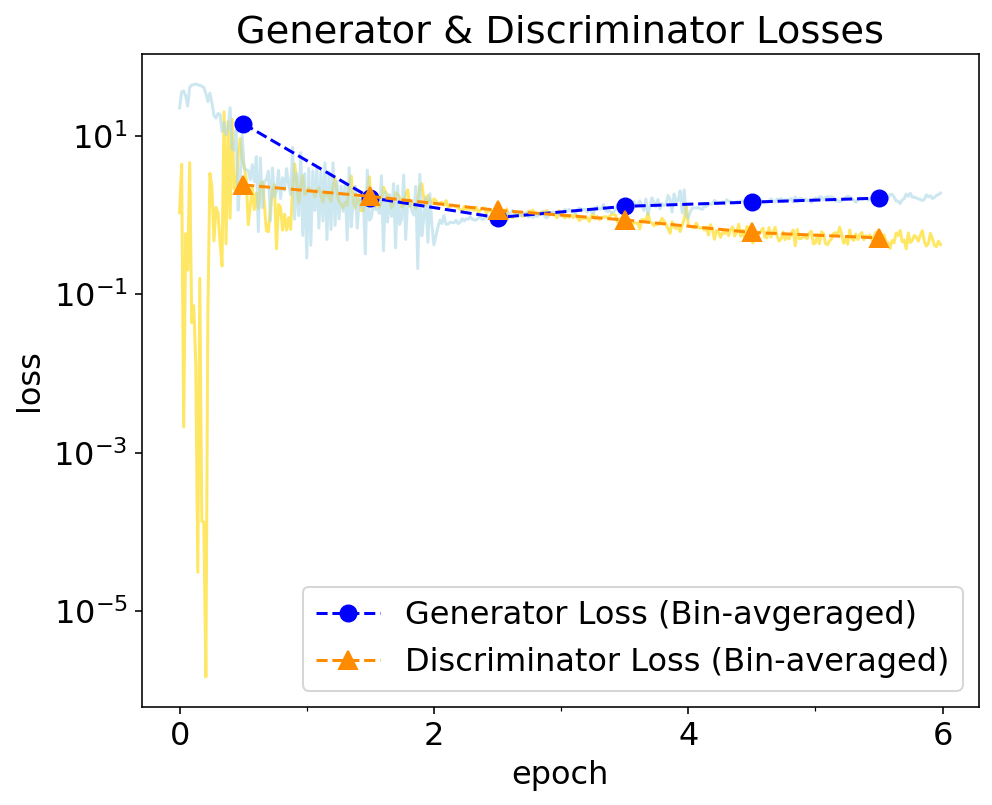

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6))
plt.rc('font', size=16)

iter_tick = np.array(range(len(trainInfo['loss_G'])))/len(generator.dataloader)

epoch_tick = np.array(range(len(trainInfo['epoch_loss_G'])))+0.5

ax.plot(iter_tick , trainInfo['loss_G'], color='lightblue', alpha=0.6, zorder=-1)
ax.plot(epoch_tick, trainInfo['epoch_loss_G'], 'o--', label='Generator Loss (Bin-avgeraged)', color='b', markersize=8)

ax.plot(iter_tick, trainInfo['loss_D'], color='gold', alpha=0.6, zorder=-2)
ax.plot(epoch_tick, trainInfo['epoch_loss_D'], '^--', label='Discriminator Loss (Bin-averaged)', color='darkorange', markersize=9)

ax.set_title(f'Generator & Discriminator Losses')

ax.set_yscale('log')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
# ax.set_xlim([0, end])
# ax.set_ylim([0.1, end])
ax.xaxis.set_major_locator(MultipleLocator(2))
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.legend()

# file_fig = '/home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/out_loss.png'
# fig.savefig(file_fig, dpi=300, transparent=False, facecolor='white')

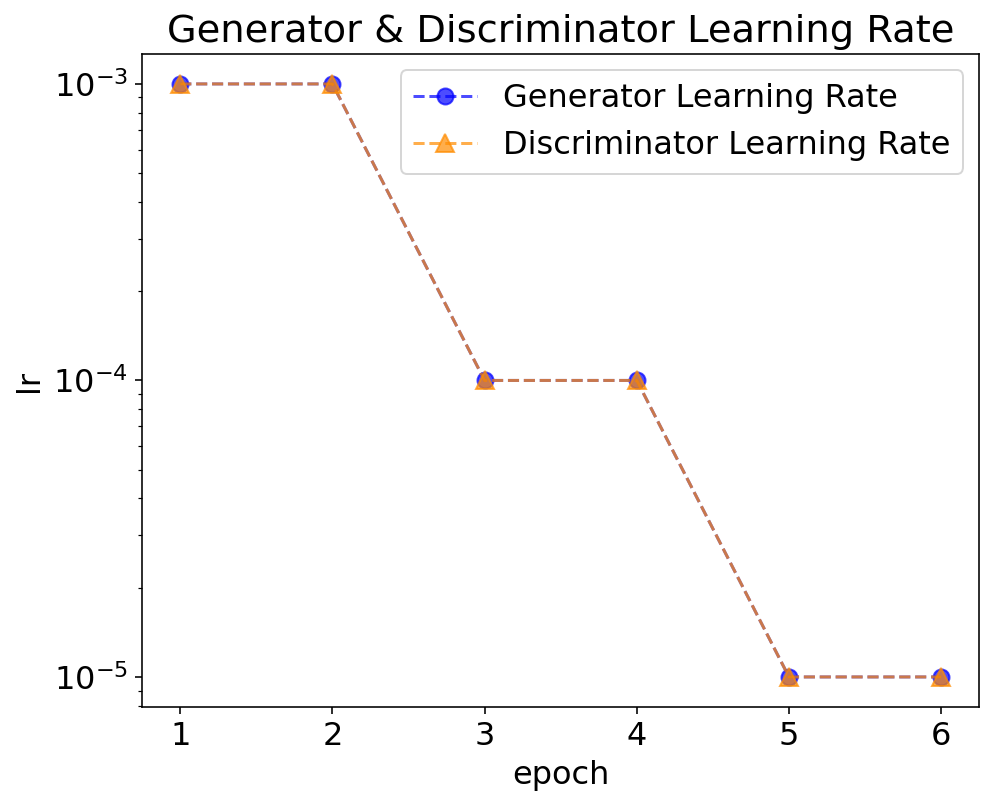

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6))
plt.rc('font', size=16)

epoch_tick = np.array(range(len(trainInfo['lr_G']))) + 1

ax.plot(epoch_tick, trainInfo['lr_G'], 'o--', label='Generator Learning Rate', color='b', markersize=8, alpha=0.7)
ax.plot(epoch_tick, trainInfo['lr_D'], '^--', label='Discriminator Learning Rate', color='darkorange', markersize=9, alpha=0.7)

ax.set_title(f'Generator & Discriminator Learning Rate')

ax.set_yscale('log')
ax.set_ylabel('lr')
ax.set_xlabel('epoch')
ax.legend()

# file_fig = '/home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/out_lr.png'
# fig.savefig(file_fig, dpi=300, transparent=False, facecolor='white')
# plt.close(fig)

## Draw Galaxy Images

- Use the class method `generator.gen_galaxy` to display generator images at each `epochID`.

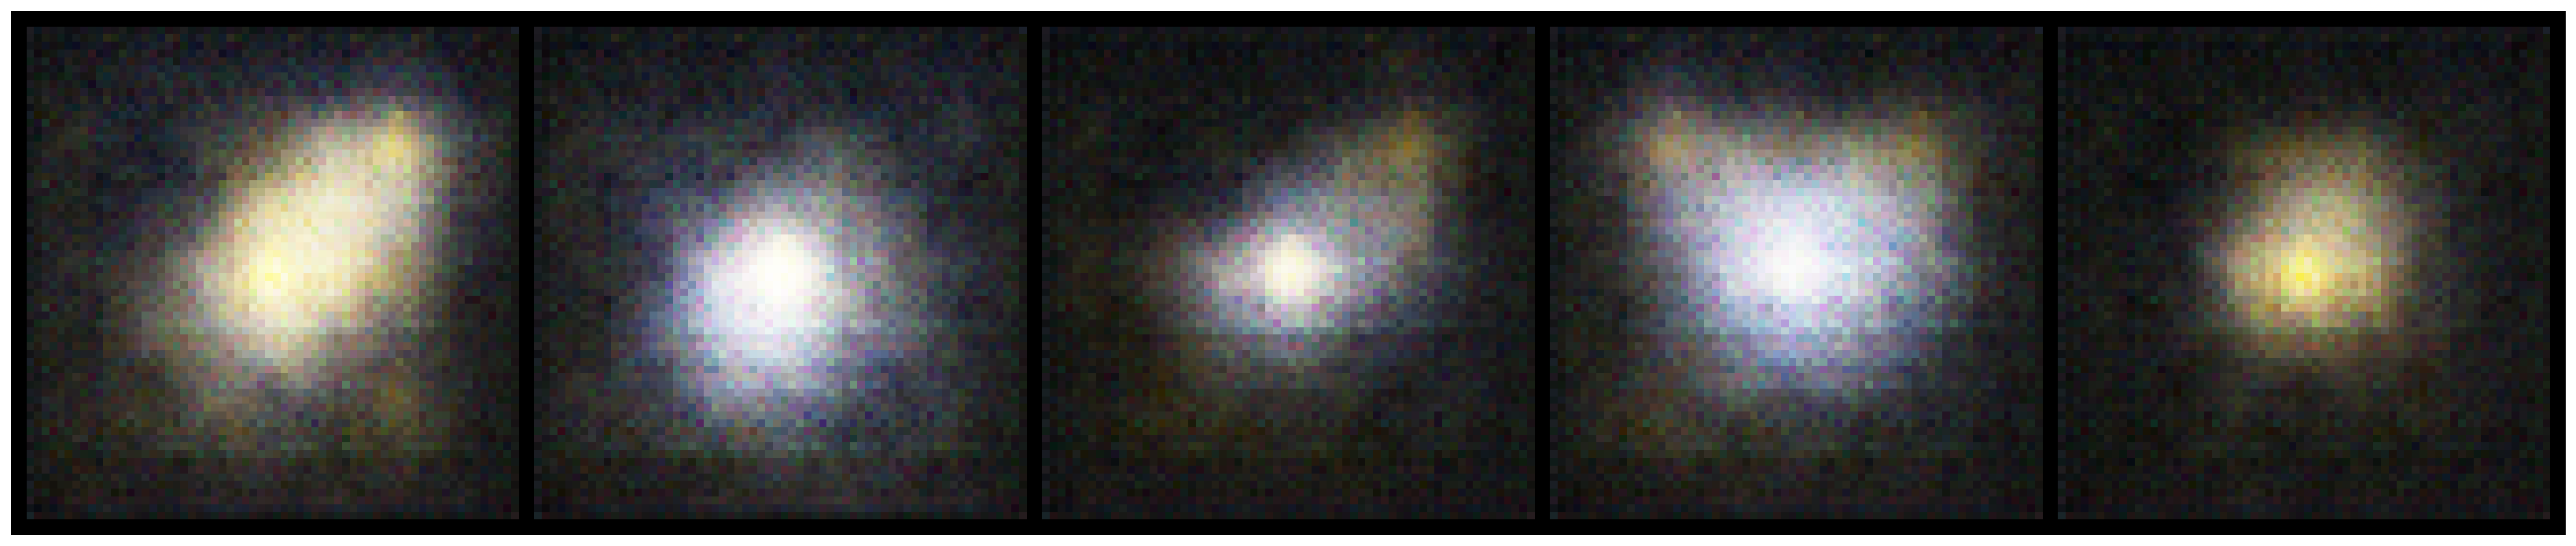

In [10]:
Ngals = 5
epochID = 5
nrow = 1
img_grid = generator.gen_galaxy(Ngals, epochID, nrow=nrow)

# ------ plots ------
fig = plt.figure( figsize=(5*(Ngals//nrow), 5.1*nrow) )
plt.axis("off")
plt.imshow(img_grid)
plt.tight_layout()

# file_fig = f'/home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/out_{epochID}.png'
# fig.savefig(file_fig, dpi=300, transparent=False, facecolor='white')
# plt.close(fig)